In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df_input=df.drop('ocean_proximity',axis=1)

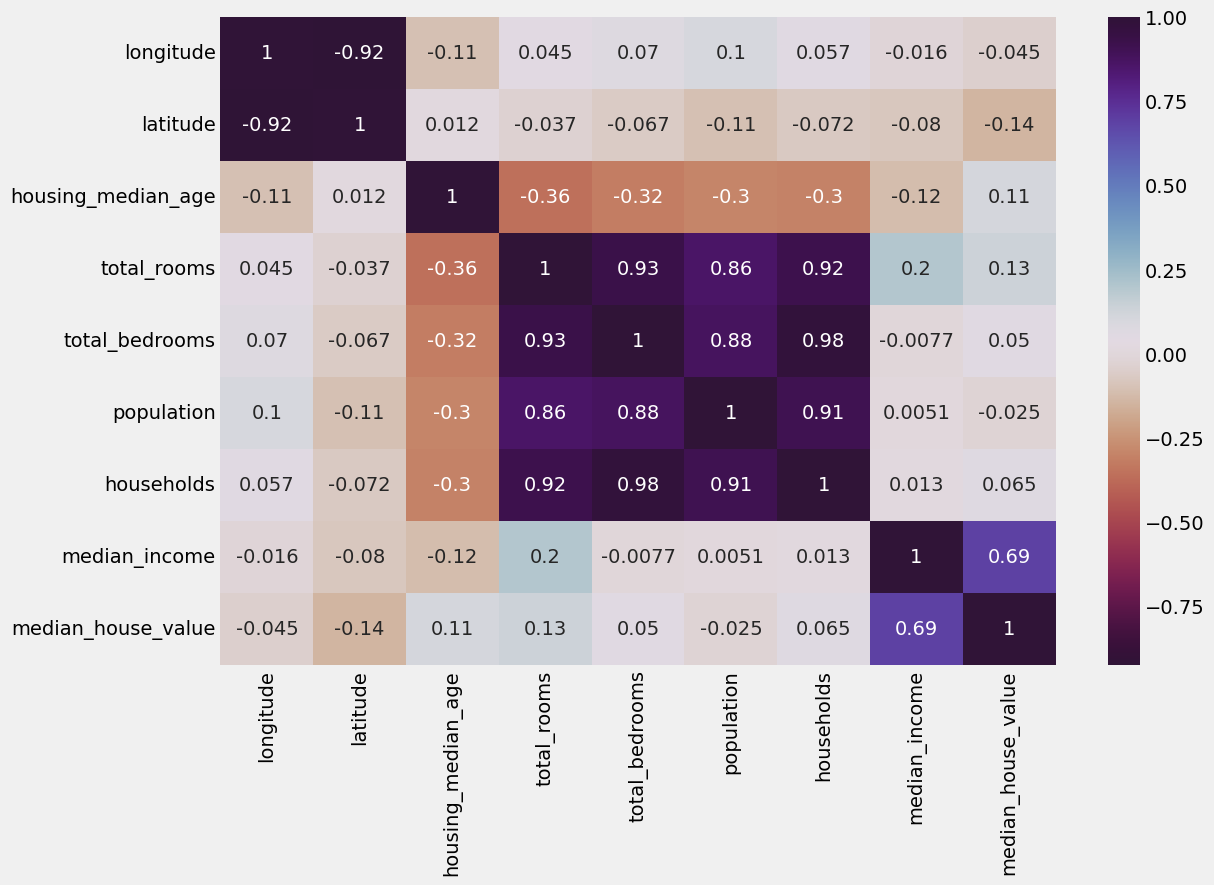

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.heatmap(df_input.corr(),annot=True,cmap=plt.cm.twilight_shifted_r)
plt.show()

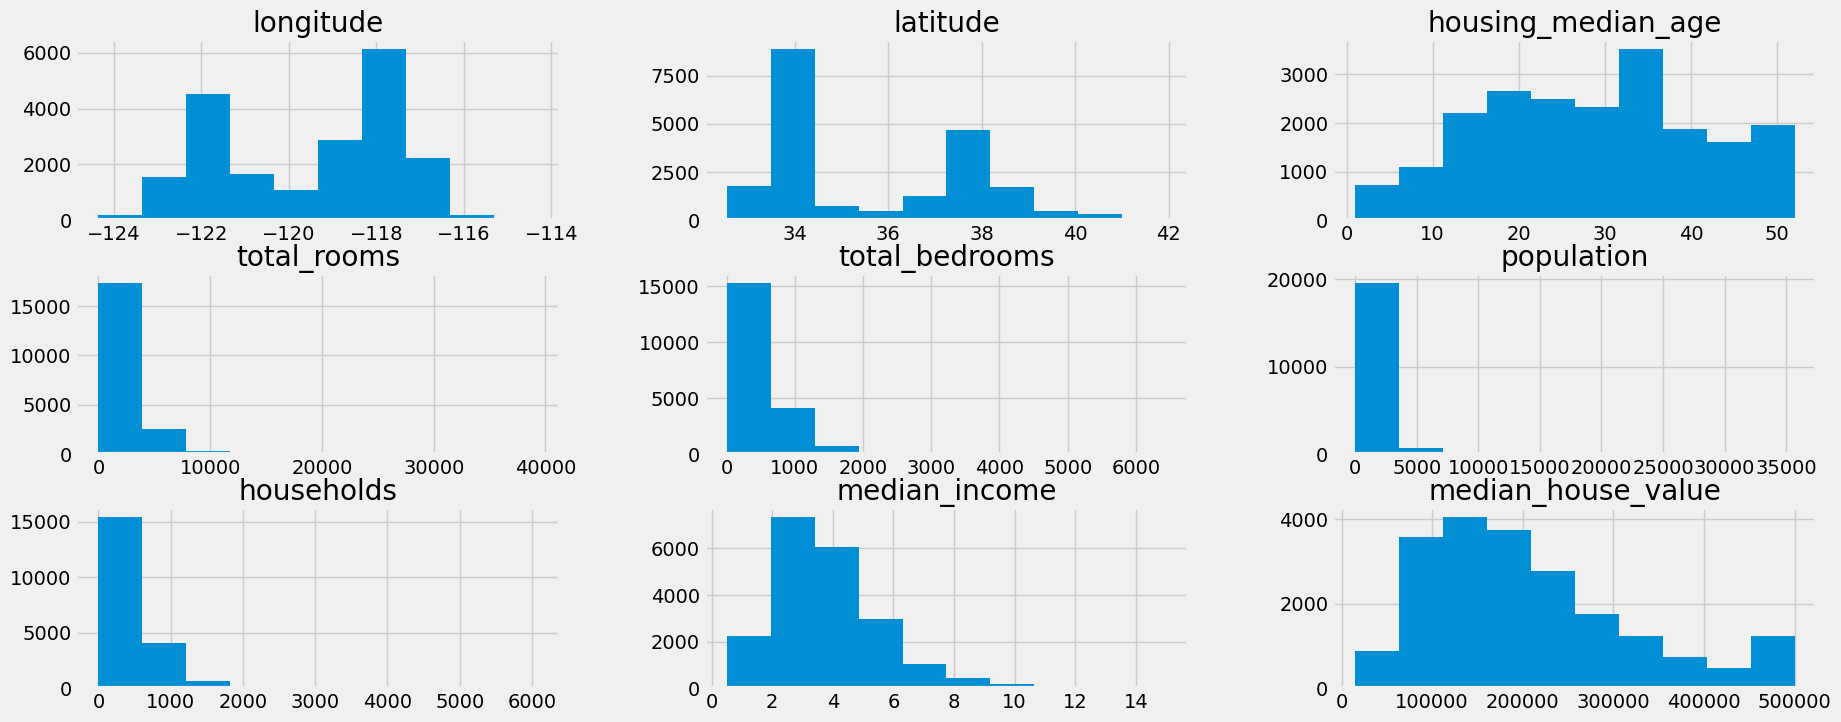

In [8]:
df_input.hist(figsize=(20,8))
plt.show()

In [9]:
df['total_rooms']=np.log(df['total_rooms']+1)
df['total_bedrooms']=np.log(df['total_bedrooms']+1)
df['population']=np.log(df['population']+1)
df['households']=np.log(df['households']+1)
df['median_income']=np.log(df['median_income']+1)

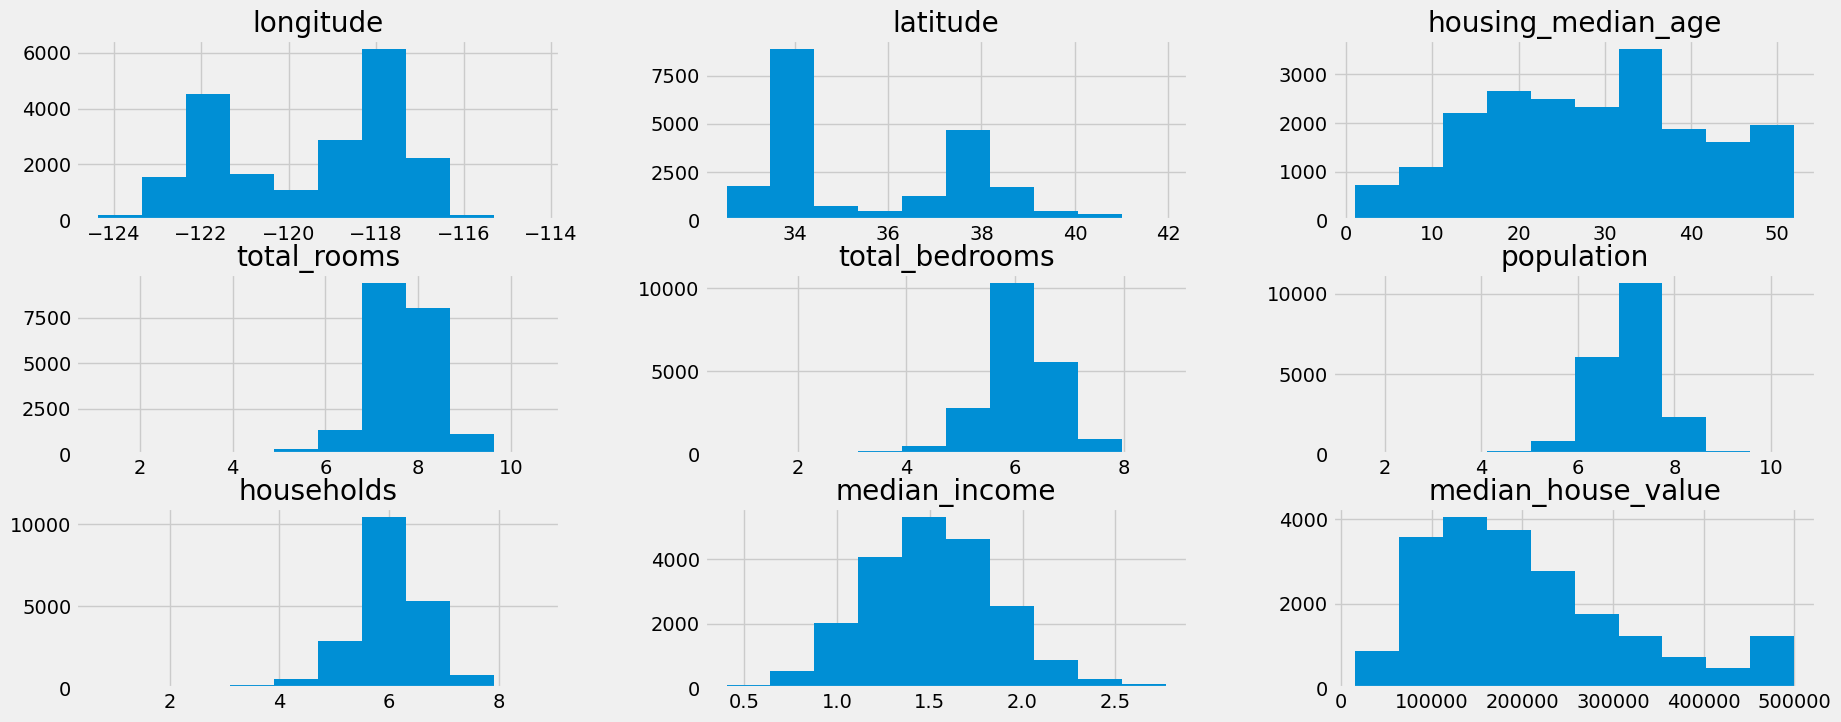

In [10]:
df.hist(figsize=(20,8))
plt.show()

In [11]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [12]:
df=pd.concat([df,pd.get_dummies(df['ocean_proximity'])],axis=1).drop('ocean_proximity',axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,False,False,False,True,False


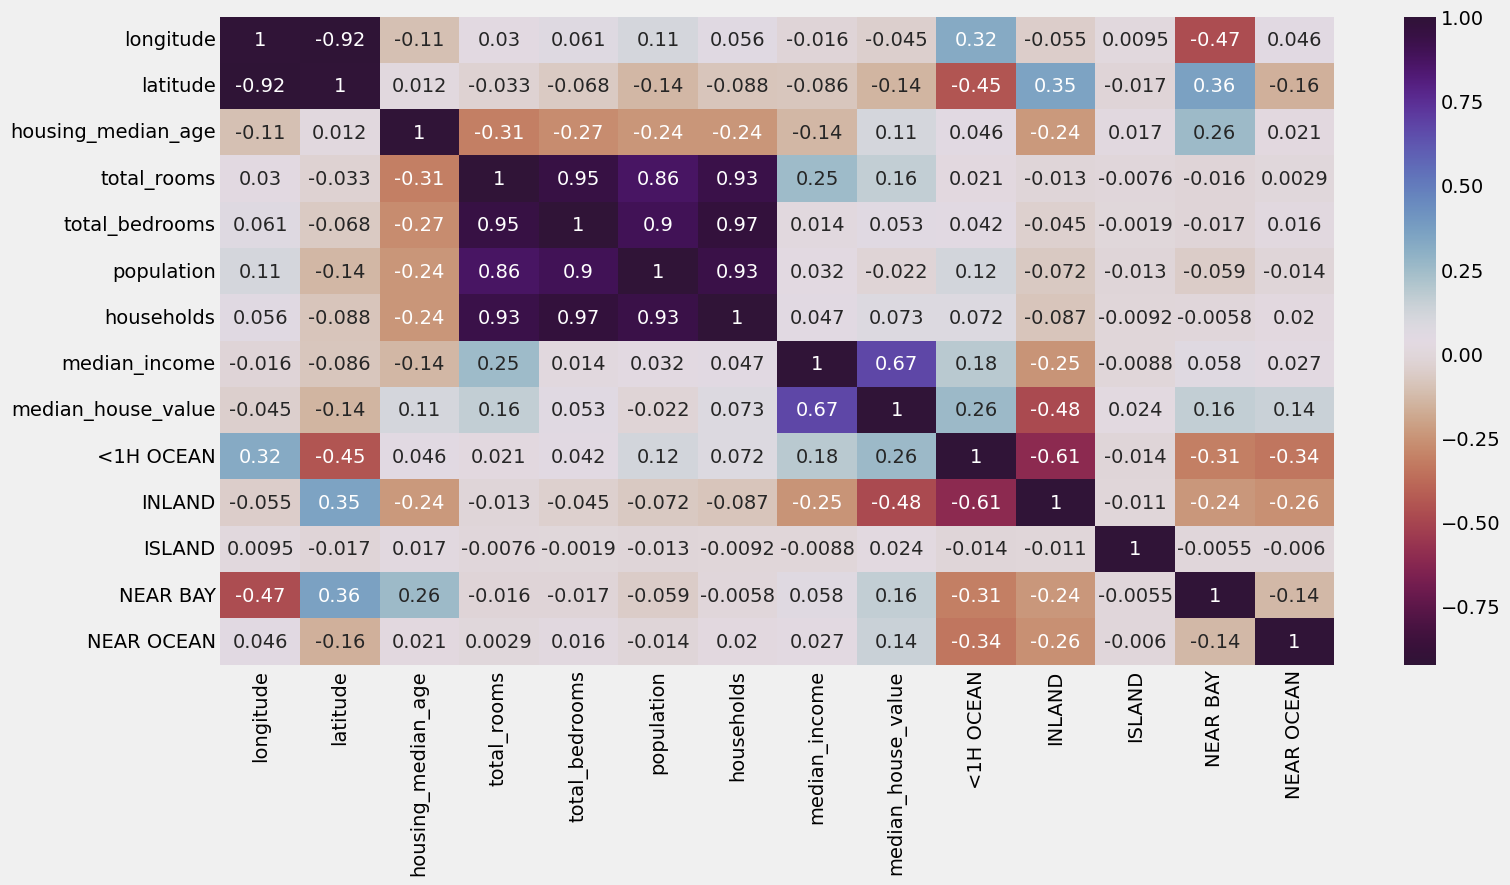

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.twilight_shifted_r)
plt.show()

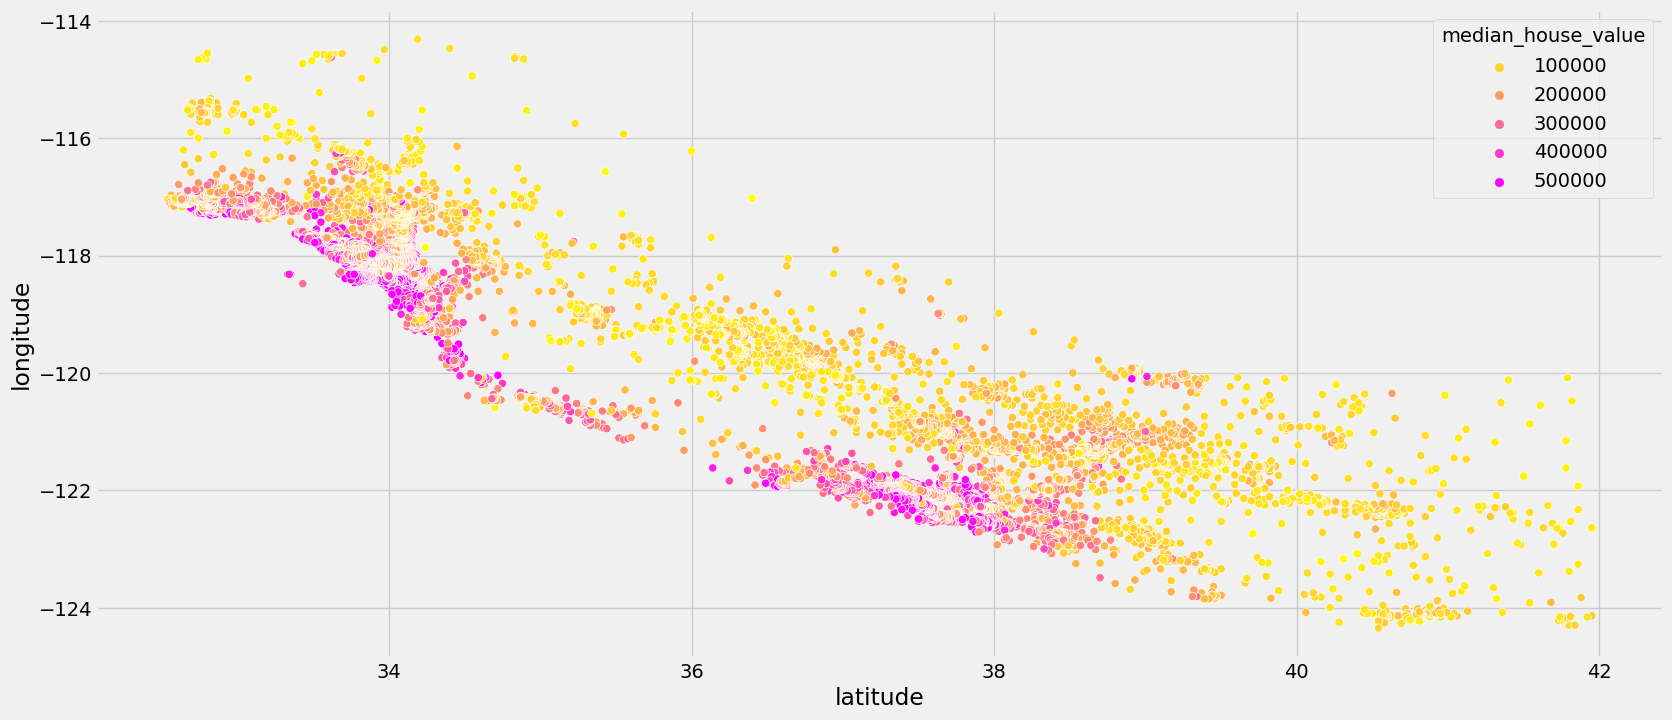

In [14]:
plt.figure(figsize=(18,8))
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['median_house_value'],data=df,palette=plt.cm.spring_r)
plt.show()

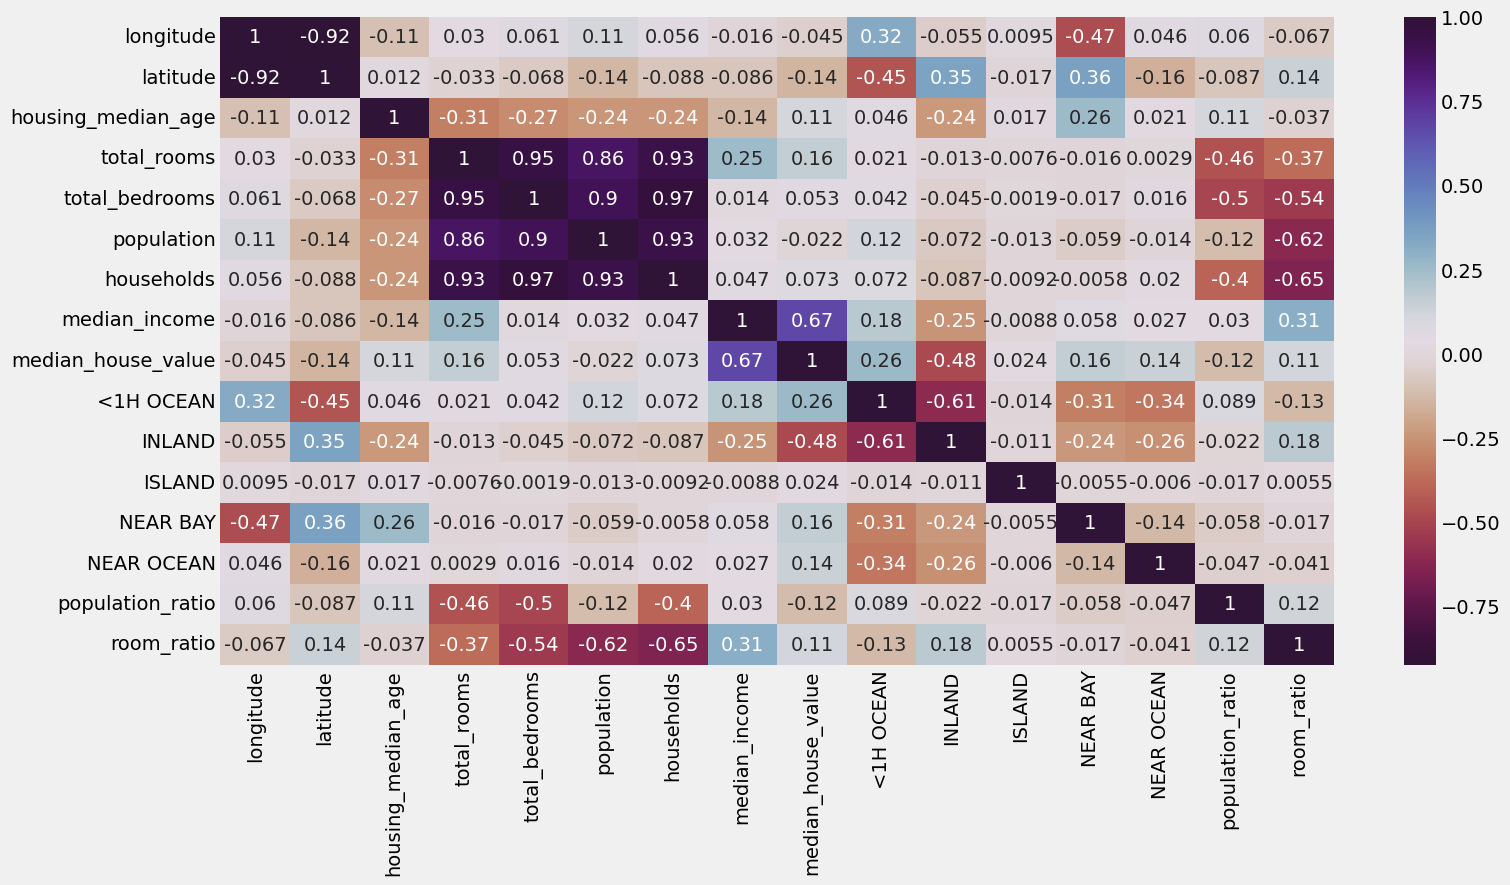

In [15]:
df['population_ratio']=df['population']/df['total_bedrooms']
df['room_ratio']=df['total_rooms']/df['households']
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.twilight_shifted_r)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [17]:
x,y=df.drop('median_house_value',axis=1),df['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16346, 15), (4087, 15), (16346,), (4087,))

In [18]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test_transform=scalar.transform(x_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)
forest.score(x_test_transform,y_test)

0.8077720729111093

In [21]:
param_grid={
    "n_estimators":[100,150,200],
    "min_samples_split":[2,3],
}
grid_search=GridSearchCV(forest,param_grid,cv=10,return_train_score=True,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             return_train_score=True)

In [22]:
print(f'Best score: {grid_search.best_score_}')
print(f'Best params: {grid_search.best_params_}')

Best score: 0.808986118709147
Best params: {'min_samples_split': 3, 'n_estimators': 200}


In [23]:
forest.n_estimators=200
forest.min_samples_split=2
forest.fit(x_train,y_train)
forest.score(x_test_transform,y_test)

0.8079186514391618

In [25]:
import pickle

with open('models/house_price_model.h5','wb') as f:
    pickle.dump(forest,f)
with open('assets/scalar.h5','wb') as f:
    pickle.dump(scalar,f)